In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros e constantes da simulação

In [2]:
N = 10**4       # Número de momentos magnéticos
kB = 1.         # Constante de Boltzmann
T = 1.          # Temperatura
Passos = 200    # Número de passos de Monte Carlo da simulação
beta = 1/(kB*T)

In [3]:
B = np.array([0, 1, 2])
rng = np.random.default_rng()

# Matrizes que armazenam os estados

In [4]:
# Partimos do estado uniforme -1/2
s_t = np.full((Passos+1,B.shape[0],N), -.5)  
# escolhemos alterações possiveis
s_rand = rng.choice([-.5,.5], size=(Passos,N))
aceite_arr = rng.random(size=(Passos,N))

# Laço principal

In [5]:
for k in range(Passos):     # Percorremos os passos de Monte Carlo
    s_change = np.abs(s_rand[k]-s_t[k])    # Cada partícula tem chance de mudar
    delta_E = (2*s_t[k].T*B).T
    aceite_rand = aceite_arr[k] < np.exp(-beta*delta_E) # Decidimos aceite
    # operador temporal
    multiplicadores = -s_change*aceite_rand*2 +1    
    # Registramos os estados a cada passo de Monte Carlo
    s_t[k+1] = s_t[k]*multiplicadores    

# exibição dos gráficos

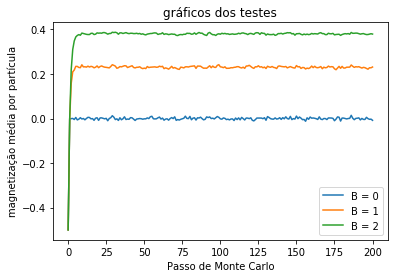

In [6]:
plt.plot(s_t.mean(axis=2))
plt.title("gráficos dos testes")
plt.ylabel("magnetização média por partícula")
plt.xlabel("Passo de Monte Carlo")
plt.legend([f'B = {b}' for b in B])
plt.show()